3D plot of frequency spectrum of an image and after passing it through Gaussian Blur FPL

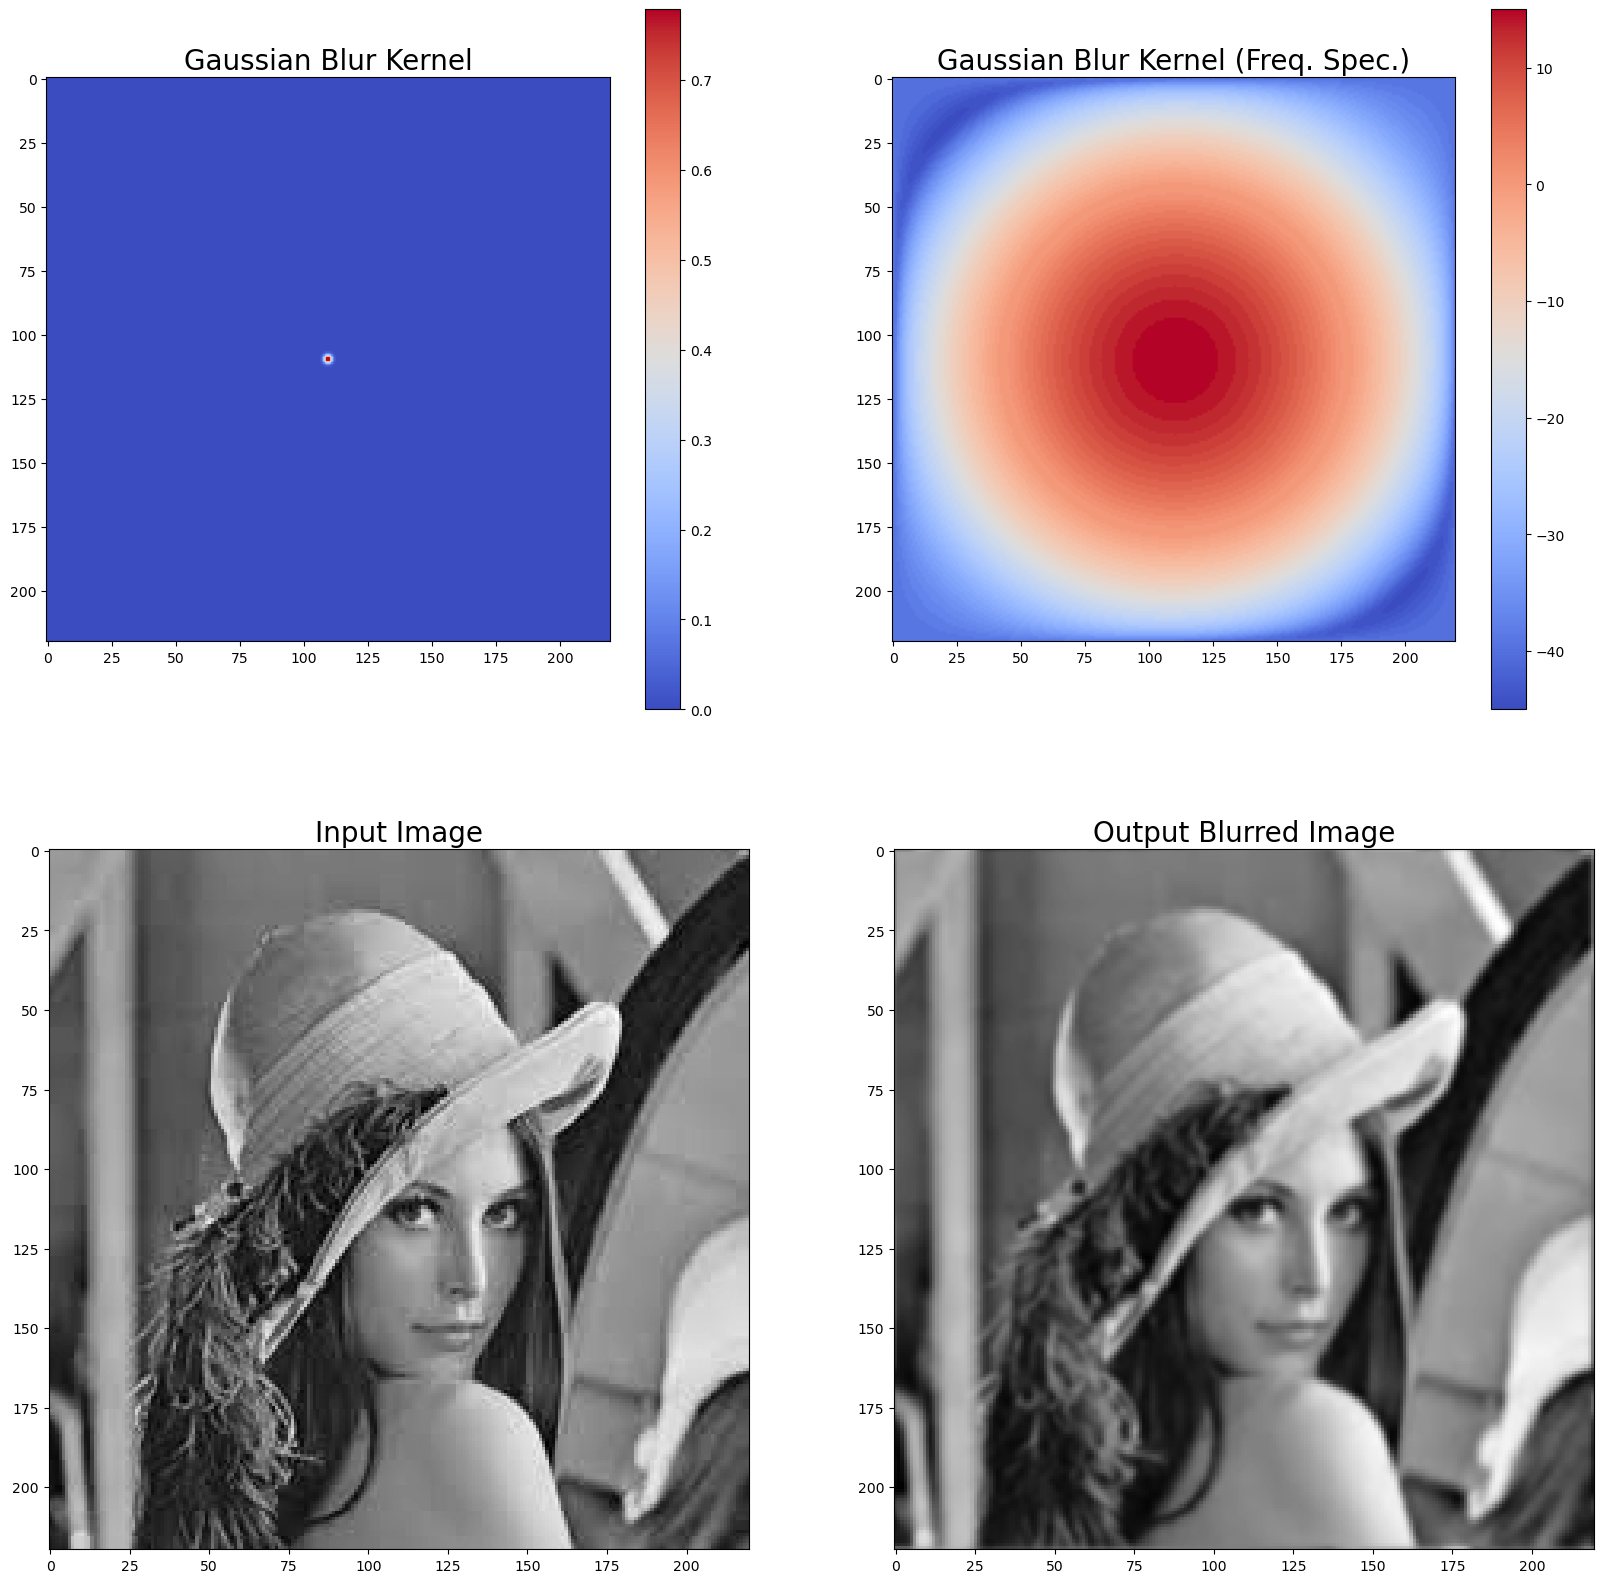

In [1]:
from scipy.signal import windows
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.color import rgb2gray
from skimage.io import imread
import scipy.fftpack as fp
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
im = rgb2gray(imread('../images/lena.jpg'))
kernel = np.outer(windows.gaussian(im.shape[1], 1), windows.gaussian(im.shape[1], 1))
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(kernel, cmap='coolwarm')
plt.colorbar()
plt.title('Gaussian Blur Kernel', size=20)
freq =  fp.fft2(im)
assert(freq.shape == kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
convolved = freq*freq_kernel
im_blur = fp.ifft2(convolved).real
im_blur = 255 * im_blur/np.max(im_blur)

plt.subplot(222)
plt.imshow((20*np.log10(0.01+fp.fftshift(freq_kernel))).real.astype(int), cmap='coolwarm')
plt.colorbar()
plt.title('Gaussian Blur Kernel (Freq. Spec.)', size=20)
plt.subplot(223)
plt.imshow(im, cmap='gray')
plt.title('Input Image', size=20)

plt.subplot(224)
plt.imshow(im_blur, cmap='gray')
plt.title('Output Blurred Image', size=20)

plt.show()

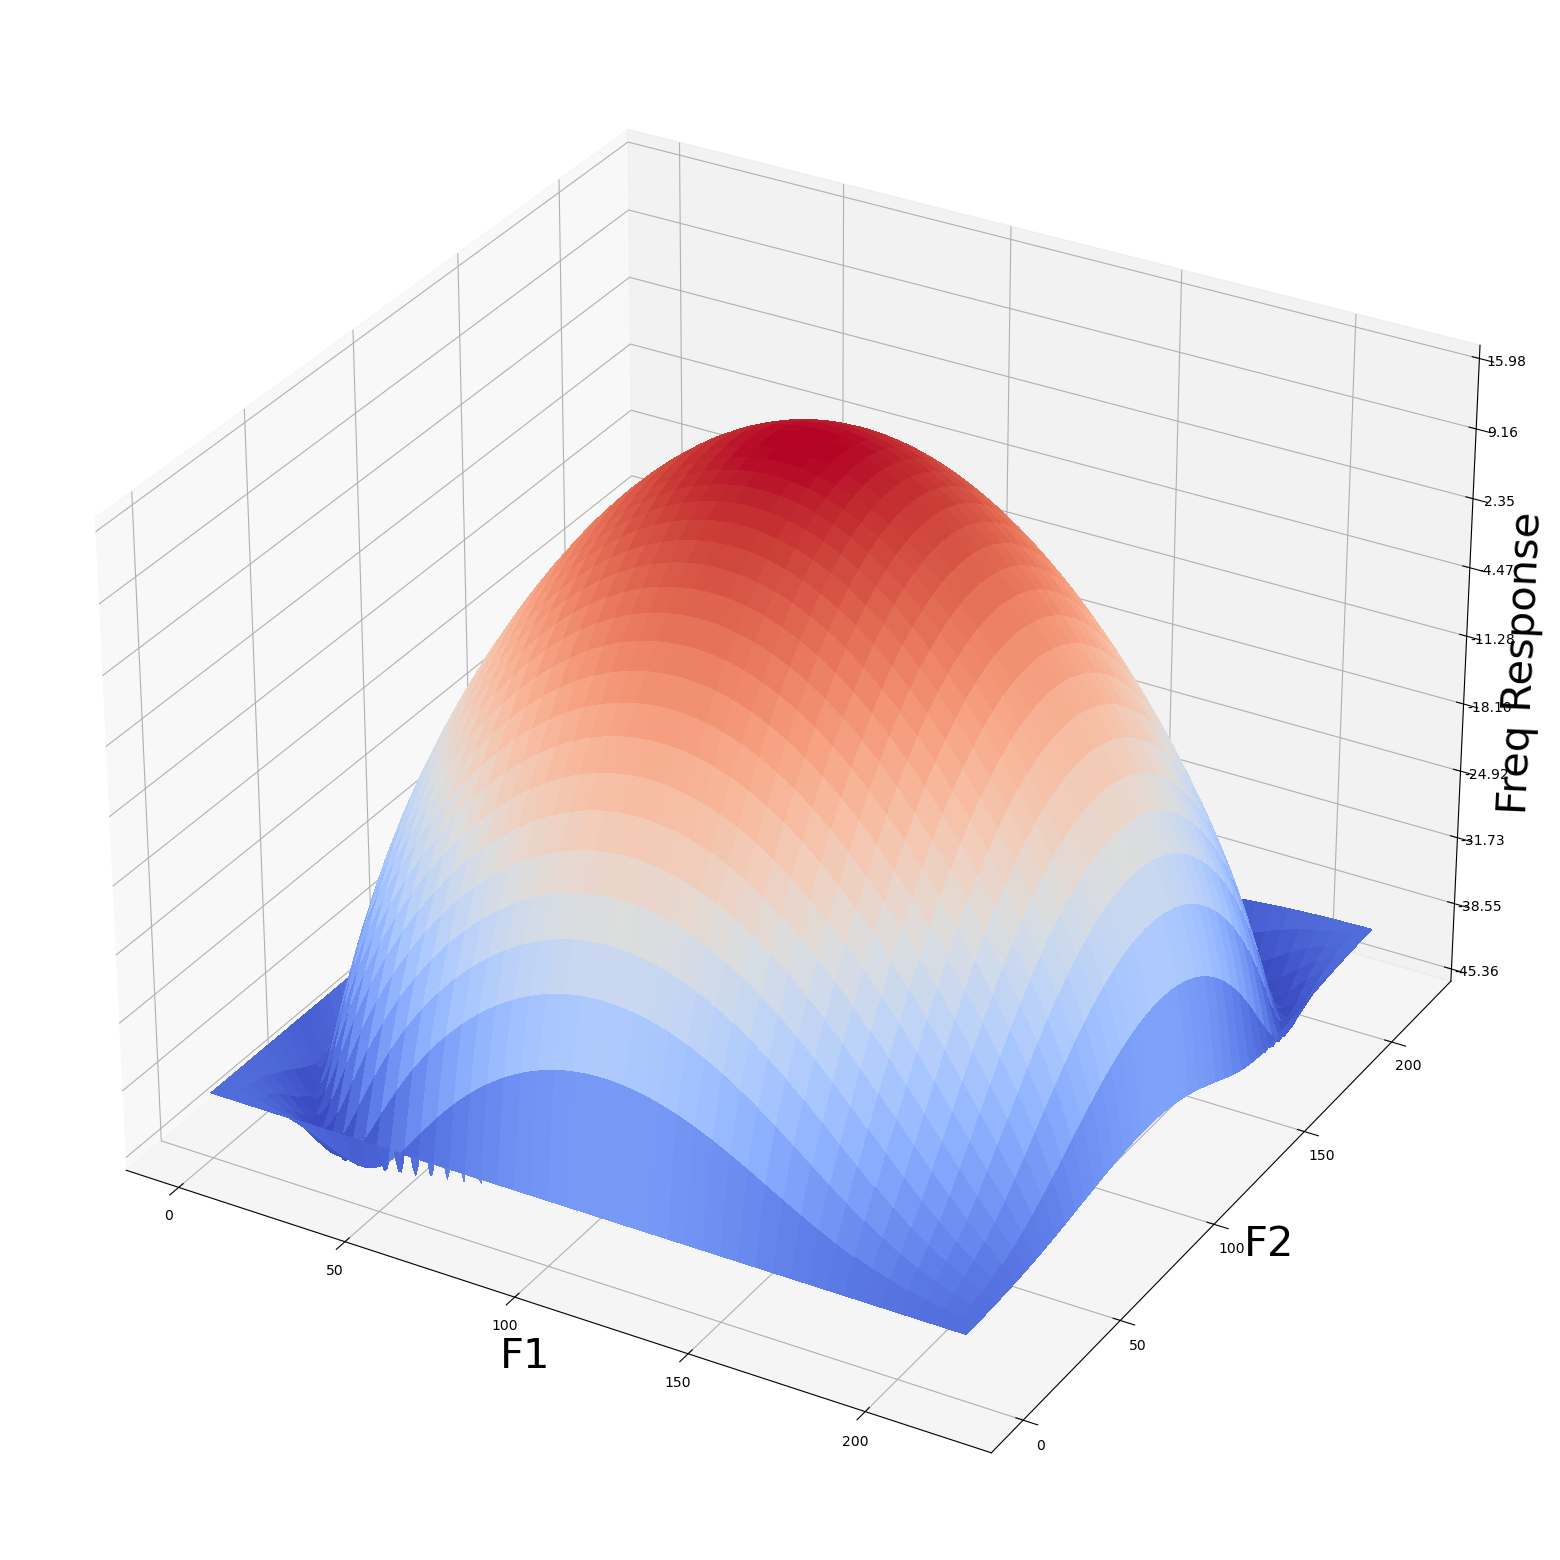

In [2]:
from mpl_toolkits.mplot3d import Axes3D  # Cần import Axes3D cho đồ thị 3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy.fftpack as fp

def plot_3d(X, Y, Z):
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_xlabel('F1', size=30)
    ax.set_ylabel('F2', size=30)
    ax.set_zlabel('Freq Response', size=30)
    plt.show()

# Khởi tạo Figure và thêm đồ thị 3D
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

# Khởi tạo dữ liệu X, Y, Z
Y = np.arange(freq.shape[0])
X = np.arange(freq.shape[1])
X, Y = np.meshgrid(X, Y)
Z = (20*np.log10(0.01 + fp.fftshift(freq_kernel))).real

# Gọi hàm để vẽ đồ thị
plot_3d(X, Y, Z)


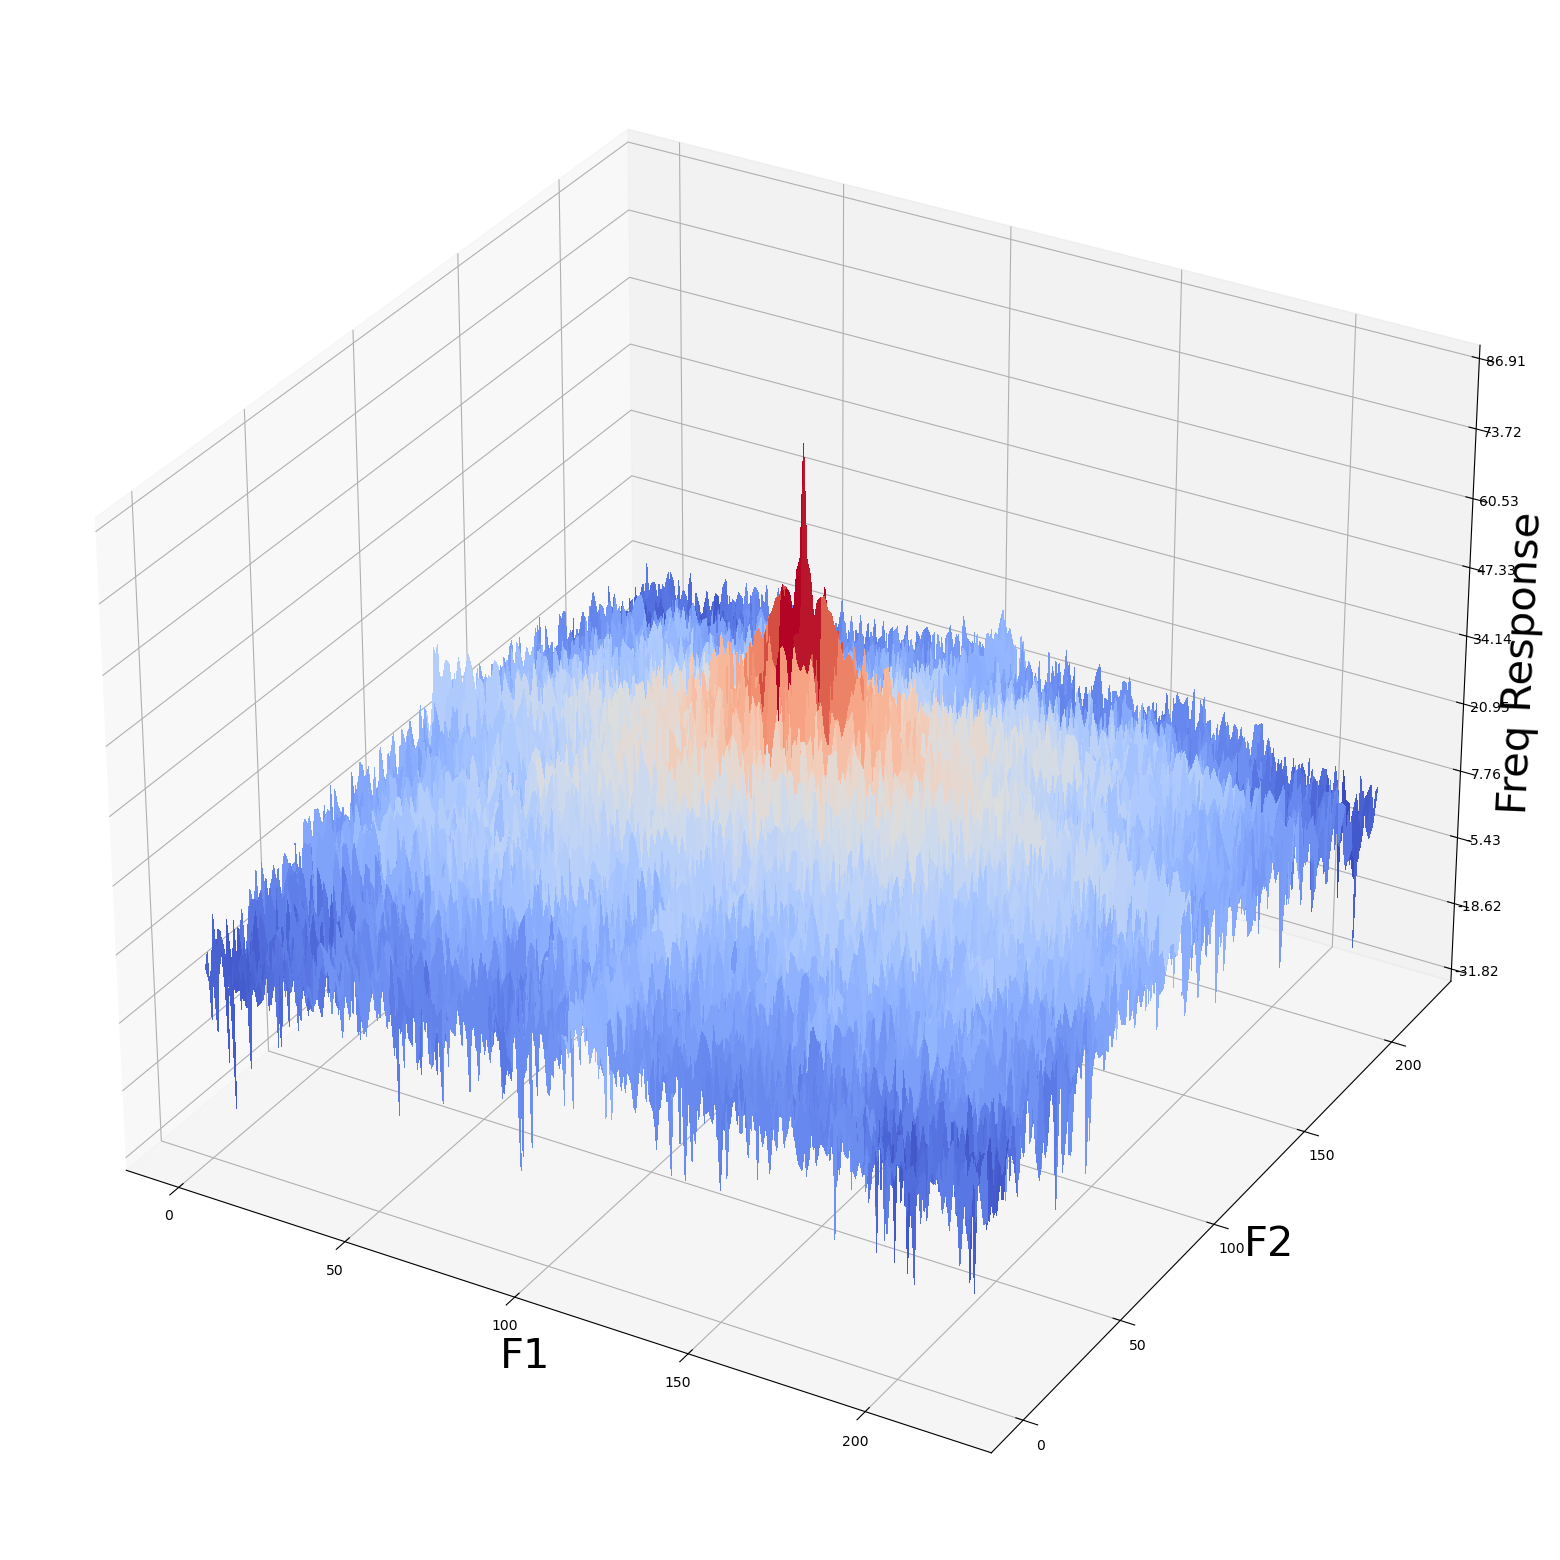

In [3]:
from mpl_toolkits.mplot3d import Axes3D  # Import cho đồ thị 3D
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as fp

def plot_3d(X, Y, Z):
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_xlabel('F1', size=30)
    ax.set_ylabel('F2', size=30)
    ax.set_zlabel('Freq Response', size=30)
    plt.show()

# Khởi tạo Figure và Axes 3D
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')  # Sử dụng add_subplot với projection='3d'

# Tạo dữ liệu X, Y và Z
Y = np.arange(freq.shape[0])
X = np.arange(freq.shape[1])
X, Y = np.meshgrid(X, Y)

# Tính Z dựa trên giá trị tần số
Z = (20 * np.log10(0.01 + fp.fftshift(freq))).real

# Vẽ đồ thị 3D
plot_3d(X, Y, Z)


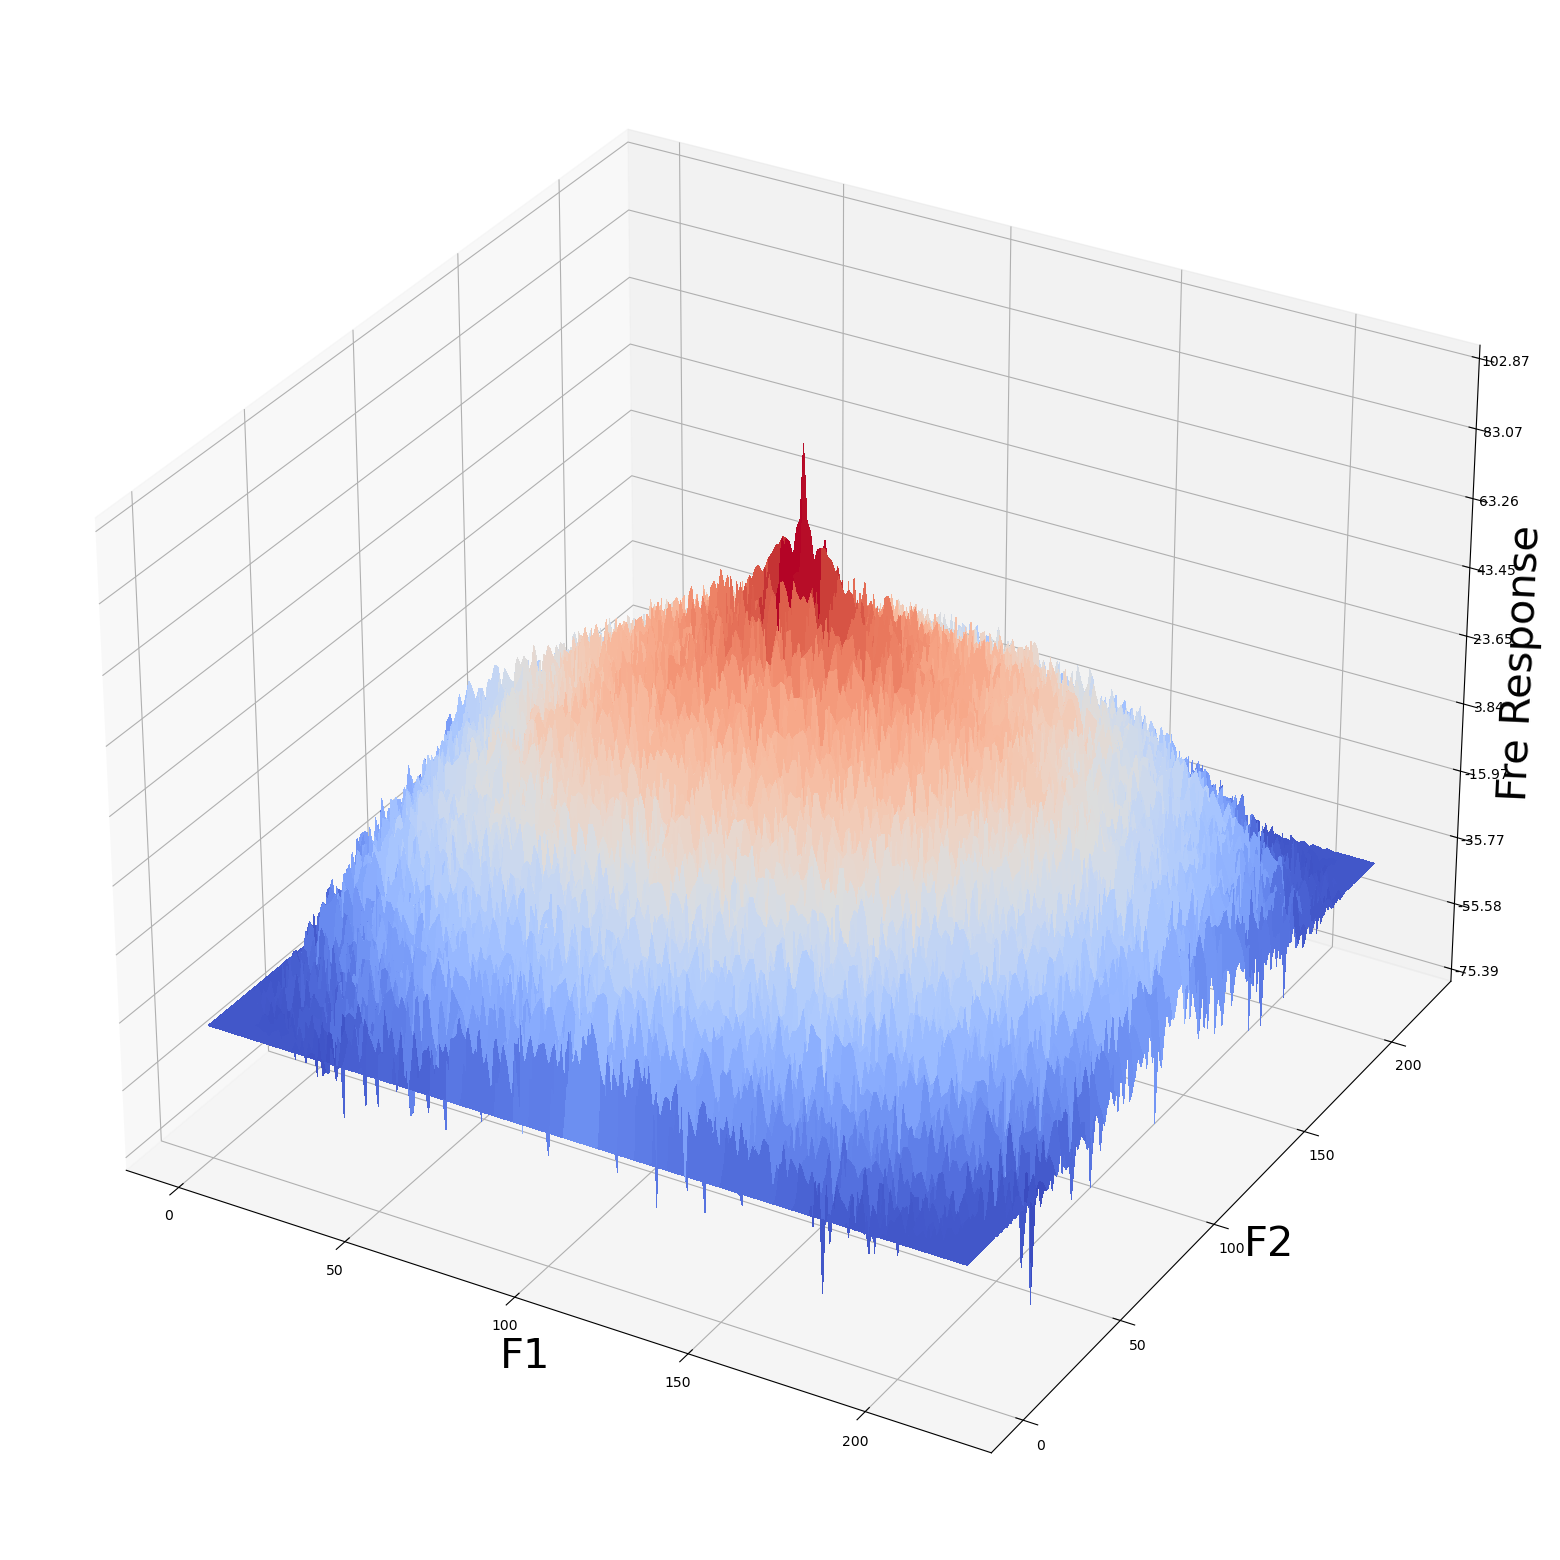

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as fp

def plot_3d(X, Y, Z):
    surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth = 0, antialiased = False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_xlabel('F1', size = 30)
    ax.set_ylabel('F2', size = 30)
    ax.set_zlabel('Fre Response', size = 30)
    plt.show()
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection = '3d')
Z = (20*np.log10(0.01+fp.fftshift(convolved))).real
plot_3d(X, Y, Z)